A lead ball of radius $r$ and mass $m$ falls in glycerol (dynamic viscosity $\eta_g = 0.950 Pa \, s$). Its position in time is given by:

\begin{equation}
y(t) = h + t v_t + \tau v_t \left( e^{-\frac{t}{\tau}} - 1 \right)
\end{equation}

Where $h$ is the initial height, $v_t$ is the terminal velocity ($v_t = - m g / \gamma$), $\tau$ the scale of the transient time ($\tau = m / \gamma$), $\gamma = 6 \pi \eta_g r$.

Represent the time of fall for different values of $m$ and $h$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import approx

In [2]:
def fall_time(m, h, args):
    eta_g , r, g = args
    gamma = 6 * np.pi * eta_g * r
    v_t = -m * g / gamma
    tau = m / gamma

    t = np.linspace(0, 1000, 100)
    f = lambda t: h + t * v_t + tau * v_t * (np.exp(-t/tau) - 1)

    '''Estimating roots'''

    estimated_root = 0

    for i in range(len(t)-1):
        if f(t[i]) * f(t[i+1]) < 0:
            estimated_root = (t[i] + t[i+1])/2
            break


    '''Approximating root with Bolzano'''

    iterations = 100
    stop_condition = 1e-16

    dt = t[1] - t[0]

    first_point = max(0, estimated_root - dt)
    second_point = estimated_root + dt
    point, error = approx.bolzano(f, estimated_root, first_point, second_point, iterations, stop_condition)[0:2]
    fall_time = point[-1]
    error_y = abs(f(fall_time))

    return fall_time

def fall_time2(m_array, h_array, args):
    M, H = np.meshgrid(m_array, h_array)
    
    Z = np.zeros([len(m_array), len(h_array)])
    for i in range(len(m_array)):
        m = m_array[i]
        for j in range(len(h_array)):
            h = h_array[j]
            Z[i][j] = fall_time(m, h, args)
            
    return Z

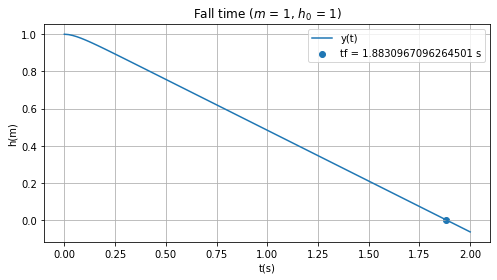

In [19]:
m = 1
h = 1

eta_g = 0.950
r = 1
g = 9.8

args = [
        eta_g,
        r,
        g
        ]

gamma = 6 * np.pi * eta_g * r
v_t = -m * g / gamma
tau = m / gamma

t = np.linspace(0, 2, 100)
f = lambda t: h + t * v_t + tau * v_t * (np.exp(-t/tau) - 1)

tf = fall_time(m, h, args)

width, height = plt.figaspect(.5)
plt.figure(figsize=(width, height))
plt.title('Fall time ($m$ = ' + repr(m) + ', $h_0$ = ' + repr(h) + ')')
plt.plot(t, f(t), label='y(t)')
plt.scatter(tf, f(tf), label='tf = ' + repr(tf) + ' s')
plt.xlabel('t(s)')
plt.ylabel('h(m)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

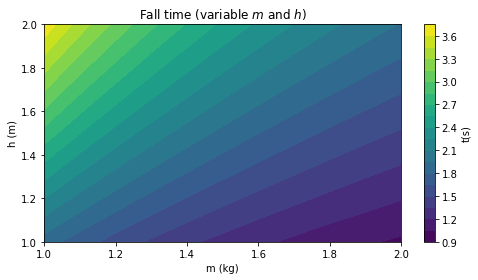

In [25]:
m_array = np.linspace(1, 2, 50)
h_array = np.linspace(1, 2, 50)

M, H = np.meshgrid(m_array, h_array)
Tf = fall_time2(m_array, h_array, args)

width, height = plt.figaspect(.5)
plt.figure(figsize=(width, height))
plt.title('Fall time (variable $m$ and $h$)')
plt.contourf(M, H, Tf.T, levels=20)
plt.colorbar().set_label('t(s)')
plt.xlabel('m (kg)')
plt.ylabel('h (m)')
plt.show()